# 一. 线性回归的数学基础

1. 线性回归的应用场景举例     
&emsp;&emsp;|-产品数量与生产成本的关系；  
&emsp;&emsp;|-身高与年龄的关系；   

2. 一个线性回归的数据例子     
&emsp;&emsp;|-年龄与身高的数据，采集2-9岁的小孩的身高数据，在一定年龄段，年龄与身高是成正比的。这就是线性关系。   
&emsp;&emsp;|-其中b表示就是出生的孩子有最低身高。   

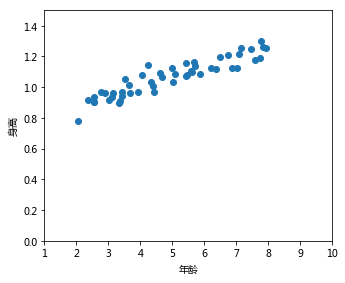

In [5]:
% matplotlib inline
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

# 年龄
age = np.loadtxt('ex2x.dat')
# 身高
height = np.loadtxt('ex2y.dat')


figure = plt.figure('机器学习可视化',figsize=(5,4))
ax = figure.add_axes([0.1, 0.1, 0.8, 0.8], label='年龄与身高')
ax.set_xlim(left=1,right=10)
ax.set_ylim(bottom=0,top=1.5)
ax.set_xlabel('年龄')
ax.set_ylabel('身高')
ax.scatter(x=age, y=height)
plt.show()

3. 线性回归分成一元线性回归与多元线性回归   
&emsp;&emsp;|-一元线性回归：输入一个数据特征  （一个自变量和因变量）     
&emsp;&emsp;|-多元线性回归：输入多个数据特征  （多个自变量和因变量） 

&emsp;&emsp;**说明：**    
&emsp;&emsp;&emsp;&emsp;多数情况下都是多元回归。     
&emsp;&emsp;&emsp;&emsp;因变量也可以是多元的，用于多类分类。

4. 线性回归的数学模型   
&emsp;&emsp;输入特征与输出特征的线性关系建模(一个样本)：    
&emsp;&emsp;&emsp;&emsp;$y=xW+b$     
&emsp;&emsp;其中:     
&emsp;&emsp;&emsp;&emsp;$x=(x_1,x_2,\dots,x_n)$     
&emsp;&emsp;&emsp;&emsp;$W^T=(w_1,w_2,\dots,w_n)$    
&emsp;&emsp;&emsp;&emsp;$y$可以是一标量，也可以是向量。   

5. 可以使用更加简洁的模型    
&emsp;&emsp;&emsp;&emsp;$y=xW$     
&emsp;&emsp;其中:     
&emsp;&emsp;&emsp;&emsp;$x=(x_1,x_2,\dots,x_n,1)$    
&emsp;&emsp;&emsp;&emsp;$W^T=(w_1,w_2,\dots,w_n,b)$


6. 线性回归的特点   
&emsp;&emsp;|-适合数据：数值型与标称型   
&emsp;&emsp;|-缺点：对非线性数据处理能力欠缺（拟合不好）  

&emsp;&emsp;**说明：**   
&emsp;&emsp;&emsp;&emsp;标称型数据指二值数据：是与不是，表示为数值就是0与1；适合用来分类。

7. 监督学习    
&emsp;&emsp;|-线性回归就是对已知数据集合$x,y$，找到一个合适的$W$与$b$，使得$x,y$尽量在$y=xW+b$上。   
&emsp;&emsp;|-从已知结果的数据，通过算法，找到$W$的过程，称为机器学习（机器训练）。   
&emsp;&emsp;|-通过已知数据学习的过程，叫监督学习。   

8. 线性回归有两大数学应用基础：     
&emsp;&emsp;|-线性代数：使用线程函数建立数据特征的线性关系；    
&emsp;&emsp;|-数理统计：利用数理统计来进行回归分析； 


9. 线性回归的数理统计基础     
&emsp;&emsp;在上面的例子看出来，不可能找到一个$W$，使得所有数据都在直线上 ，所以真实的数据一定存在误差，如果考虑误差的情况下，上述线性模型可以修正为如下模型（考虑到样本个体，使用$i$表示第$i$个样本）：    
&emsp;&emsp;$y^{(i)}=x^{(i)}W + \epsilon^{(i)}$     
&emsp;&emsp;或者：       
&emsp;&emsp;$y^{(i)}=x^{(i)}W + b^{(i)} + \epsilon^{(i)}$      
&emsp;&emsp;    
&emsp;&emsp; 其中$\epsilon$表示误差， $\epsilon^{(i)}$表示第$i$个样本的误差。    
&emsp;&emsp;误差 $\epsilon^{(i)}$独立并且具有相同的分布。
&emsp;&emsp;后面的推导采用$y=xW$形式。

# 二、线性回归求解的数学推导

1. 误差表示   
&emsp;&emsp;误差 $\epsilon^{(i)}$的分布，我们通常考虑服从均值为0的正态分布（Normal Distribution），也称高斯分布（Gaussian Distribution）。     
&emsp;&emsp;高斯分布公式如下：     
&emsp;&emsp;公式一：$p(x)=\dfrac{1}{\sqrt{2\pi}\sigma}exp(-\dfrac{(x-\mu)^2}{2\sigma^2})$   
&emsp;&emsp;其中$\mu$表示均值，$\sigma$表示方差。   
&emsp;&emsp;    
&emsp;&emsp;使用概率表示$\epsilon^{(i)}$的误差概率如下：    
&emsp;&emsp;公式二：$p(\epsilon^{(i)})=\dfrac{1}{\sqrt{2\pi}\sigma}exp(-\dfrac{(\epsilon^{(i)})^2}{2\sigma^2})$    
&emsp;&emsp;其中均值$\mu=0$。
&emsp;&emsp;    
&emsp;&emsp;    
&emsp;&emsp;采用条件概率表示如下：   
&emsp;&emsp;公式三：$p(y^{(i)}|x^{(i)};W)=\dfrac{1}{\sqrt{2\pi}\sigma}exp(-\dfrac{(y^{(i)}-x^{(i)}W)^2}{2\sigma^2})$

2. $W$的参数估计
&emsp;&emsp;在大量样本情况下，则可以对$W$做参数估计：    
&emsp;&emsp;（1）$W$的似然函数如下：    
&emsp;&emsp;&emsp;&emsp;$L(W)=\prod\limits_{i=1}^{m}{p(y^{(i)}|x^{(i)};W)}$    
&emsp;&emsp;&emsp;&emsp;$L(W)=\prod\limits_{i=1}^{m}{\dfrac{1}{\sqrt{2\pi}\sigma}exp(-\dfrac{(y^{(i)}-x^{(i)}W)^2}{2\sigma^2})}$    
&emsp;&emsp;&emsp;&emsp;其中$m$表示样本总数。  
&emsp;&emsp;    
&emsp;&emsp;（2）对似然函数求对数：   
&emsp;&emsp;&emsp;&emsp;$l(W)=logL(W)$     
&emsp;&emsp;&emsp;&emsp;$l(W)=log\prod\limits_{i=1}^{m}{\dfrac{1}{\sqrt{2\pi}\sigma}exp(-\dfrac{(y^{(i)}-x^{(i)}W)^2}{2\sigma^2})}$          
&emsp;&emsp;&emsp;&emsp;$l(W)=\sum\limits_{i=1}^{m}log{\dfrac{1}{\sqrt{2\pi}\sigma}exp(-\dfrac{(y^{(i)}-x^{(i)}W)^2}{2\sigma^2})}$      
&emsp;&emsp;&emsp;&emsp;$l(W)=m\ log\ \dfrac{1}{\sqrt{2\pi}\sigma}-\dfrac{1}{\sigma^2}\ \dfrac{1}{2}\sum\limits_{i=1}^{m}(y^{(i)}-x^{(i)}W)^2$    

3. 求$W$的最大似然估计（求导，取0点值的$W$）：     
&emsp;&emsp;&emsp;对$l(W)$求导，其中$m\ log\ \dfrac{1}{\sqrt{2\pi}\sigma}$是常数，求导为0 ； $\dfrac{1}{\sigma^2}$也是常数，作为因数，对最终似然估计不影响。所以只对后面部分求导，我们记求导部分公式如下：    
&emsp;&emsp;&emsp;&emsp;$J(W)=\dfrac{1}{2}\sum\limits_{i=1}^{m}(x^{(i)}W-y^{(i)})^2$      
&emsp;&emsp;&emsp; 把所有样本的和表示成矩阵内积：    
&emsp;&emsp;&emsp;&emsp;$J(W)=\dfrac{1}{2}(XW-Y)^T(XW-Y)$   
&emsp;&emsp;&emsp;&emsp;其中$X=\pmatrix{x^{(1)}\\x^{(2)}\\\vdots\\x^{(m)}}$，$Y=\pmatrix{y^{(1)}\\y^{(2)}\\\vdots\\y^{(m)}}$     
&emsp;&emsp;&emsp;对$W$求偏导数：     
&emsp;&emsp;&emsp;&emsp; $\nabla_W J(W)=\nabla_W(\dfrac{1}{2}(XW-Y)^T(XW-Y))$     
&emsp;&emsp;&emsp;&emsp; $\nabla_W J(W)=\nabla_W(\dfrac{1}{2}(W^TX^T-Y^T)(XW-Y))$     
&emsp;&emsp;&emsp;&emsp; $\nabla_W J(W)=\nabla_W(\dfrac{1}{2}(W^TX^TXW-W^TX^TY-Y^TXW+Y^TY))$     
&emsp;&emsp;&emsp;&emsp; $\nabla_W J(W)=\dfrac{1}{2}(2X^TXW-X^TY-{(Y^TX)}^T)$    
&emsp;&emsp;&emsp;&emsp; $\nabla_W J(W)=X^TXW-X^TY$     
&emsp;&emsp;&emsp;对偏导数设置为0，然后求解，得到$W$：  
&emsp;&emsp;&emsp;&emsp; $W={(X^TX)}^{-1}X^TY$

4. 关于W求解  
&emsp;&emsp;注意上面尽管可以通过大量样本计算出W的值，实际上，对多维矩阵的运算一直是一个问题，运算资源消耗特别多，也特别耗时。    
&emsp;&emsp;当数据样本过大的情况下，求解上述求解线性系统（$W={(X^TX)}^{-1}X^TY$）的效率就会很低，一般会使用梯度下降（Gradient Descent）近似地估计参数。    

5. 一个数学细节      
&emsp;&emsp;公式$W={(X^TX)}^{-1}X^TY$中存在一个数学细节，就是${(X^TX)}^{-1}$中$X^TX$矩阵是否一定可逆？    
&emsp;&emsp;当然$X^TX$不能保证一定是可逆的，但可以通过两种方式处理：       
&emsp;&emsp;&emsp;&emsp;|-找出相关的数据删除，直到$X^TX$满秩。    
&emsp;&emsp;&emsp;&emsp;|-使用正则化。     

6. 线性回归的算法公式
&emsp;&emsp;     
&emsp;&emsp;     
&emsp;&emsp;$W={(X^TX)}^{-1}X^TY$     
&emsp;&emsp;      
&emsp;&emsp;下面就可以很轻松使用Python实现     
&emsp;&emsp;&emsp;&emsp;|-NumPy原生实现（数学版本）    
&emsp;&emsp;&emsp;&emsp;|-SciPy数值计算版本（专业版本）     
&emsp;&emsp;&emsp;&emsp;|-Tensorflow框架版本（工程版本）    

# 三、线性回归的numpy实现

1. 数据格式 

In [24]:
import numpy as np
import numpy.linalg as ln
# 年龄
X_DATA = np.loadtxt('ex2x.dat')
# 身高
Y_DATA = np.loadtxt('ex2y.dat')

# 改变形状(在上面的推导中，我们对x与X的定义是确定的，x是多元特征构成的行向量；X是多个样本构成的矩阵，其中每行是一个多元特征的样本)
X=np.zeros(shape=(X_DATA.shape[0], 2),dtype=np.float)
Y=Y_DATA.reshape(Y_DATA.shape[0], 1)
X[:, 0]=X_DATA
X[:, 1]=1

# print(X)
# print(Y)

2. 回顾numpy中的矩阵运算

In [25]:
W=np.matmul(
        np.matmul( 
            ln.inv(
                np.matmul( 
                    X.T,
                    X)
            ), 
            X.T
        ),
    Y
)
print(W.shape)

(2, 1)


In [26]:
# 训练的系数矩阵
print( W )

[[0.06388117]
 [0.75016254]]


3. 可视化学习效果

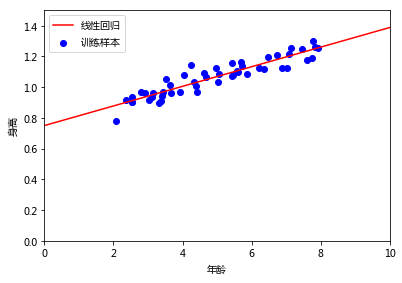

In [41]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# 年龄
age = np.loadtxt('ex2x.dat')
# 身高
height = np.loadtxt('ex2y.dat')


figure = plt.figure('机器学习可视化',figsize=(6,4))
ax = figure.add_axes([0.1, 0.1, 0.8, 0.8], label='年龄与身高')
ax.set_xlim(left=0,right=10)
ax.set_ylim(bottom=0,top=1.5)
ax.set_xlabel('年龄')
ax.set_ylabel('身高')
# 绘制训练样本
ax.scatter(x=age, y=height,color='b',label='训练样本')

# 绘制回归直线
# 设置X坐标
X_POS=np.linspace(0,10,50, dtype=np.float32)
# 构造直线的数据（其中有偏置项b在W矩阵中）
X_PRA=np.zeros(shape=(50,2), dtype=np.float32)
X_PRA[:,0]=X_POS
X_PRA[:,1]=1
# 使用W计算Y坐标
Y_POS=np.matmul(X_PRA, W)

# 绘制直线
ax.plot(X_POS,Y_POS,color='r',label='线性回归')

ax.legend()

plt.show()

# 四、线性回归的scipy实现

In [1]:
import numpy as np
from scipy import linalg
# 年龄
X_DATA = np.loadtxt('ex2x.dat')
# 身高
Y_DATA = np.loadtxt('ex2y.dat')

# 改变形状(在上面的推导中，我们对x与X的定义是确定的，x是多元特征构成的行向量；X是多个样本构成的矩阵，其中每行是一个多元特征的样本)
X=np.zeros(shape=(X_DATA.shape[0], 2),dtype=np.float)
Y=Y_DATA.reshape(Y_DATA.shape[0], 1)
X[:, 0]=X_DATA
X[:, 1]=1

W=np.dot(                       # dot运算等同于matmul运算 
        np.dot( 
            linalg.inv(            # 其他的运算沿袭numpy，scipy提供了可逆与其他比较方便的运算
                np.dot( 
                    X.T,
                    X)
            ), 
            X.T
        ),
    Y
)
print(W)    # 应该与numpy计算结果一样

[[0.06388117]
 [0.75016254]]


# 五、sklearn实现

1. 线性回归sklearn实现代码

In [4]:
from sklearn.linear_model import *
import numpy as np
# 年龄
X_DATA = np.loadtxt('ex2x.dat')
# 身高
Y_DATA = np.loadtxt('ex2y.dat')

regression=LinearRegression()
# 训练
# 数据格式整理
# Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.
# 如果是一维特征，使用reshape处理单特征形状（-1, 1），如果只有一个样本，形状reshape(1,-1)
X_RG=X_DATA.reshape(-1, 1)
Y_RG=Y_DATA
regression.fit(X_RG, Y_RG)

# 测试
print('评估：',regression.score(X_RG, Y_RG))
# 斜率
print('斜率：',regression.coef_)
# 截距
print('截距：',regression.intercept_ )


(50,)
评估： 0.858063223720823
斜率： [0.06388117]
截距： 0.7501625370012386


2. 使用sklearn计算可视化

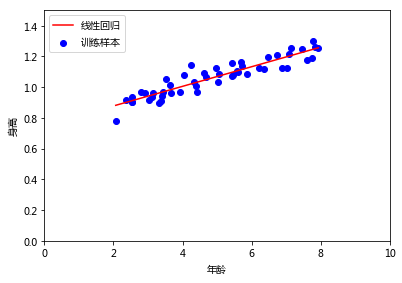

In [15]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


figure = plt.figure('机器学习sklearn可视化',figsize=(6,4))
ax = figure.add_axes([0.1, 0.1, 0.8, 0.8], label='年龄与身高')
ax.set_xlim(left=0,right=10)
ax.set_ylim(bottom=0,top=1.5)
ax.set_xlabel('年龄')
ax.set_ylabel('身高')
# 绘制训练样本
ax.scatter(x=X_DATA, y=Y_DATA,color='b',label='训练样本')

# 绘制回归直线
# 设置X坐标，直接使用后上面的X_DATA
X_POS=X_DATA
# 计算Y坐标，使用线性回归的预测值
Y_POS=regression.predict(X_RG)

# 绘制直线
ax.plot(X_POS,Y_POS,color='r',label='线性回归')

ax.legend()

plt.show()

**备注：**    
&emsp;&emsp;使用sklearn训练，其中有一个score计算参数（score的计算公式在sklearn中有详细说明），该参数说明如下：  
&emsp;&emsp;&emsp;&emsp;|-score返回的称为$R^2$预测的决定系数       
&emsp;&emsp;&emsp;&emsp;|-score的计算公式： (1 - u/v)      
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;|-u=( (y_true - y_pred )\*\*2 ).sum( )      
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;|-v=( (y_true - y_true.mean( ) ) \*\* 2).sum( )       
&emsp;&emsp;&emsp;&emsp;|-score值的几种情况：     
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;|-最好的情况是1.0，因为u=0     
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;|-最差的情况是负数。因为u/v > 1     
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;|-也可以为0，就是本身就是一个常数，训练不受输入影响。

# 六、Tensorflow实现 
&emsp;&emsp;如果不使用梯度下降算法，使用Tensorflow实现线性货回归，其实思路还是一样，就是矩阵运算。我们这儿提供这种重复的实现主要目的是学习使用Tensorflow的编程技巧。    
&emsp;&emsp;       
&emsp;&emsp;依然是这个高大上的公式：  
&emsp;&emsp;       
&emsp;&emsp;$W={(X^TX)}^{-1}X^TY$        
&emsp;&emsp;     
&emsp;&emsp;代码实现如下：    

In [21]:
import numpy as np
import tensorflow as tf

# 年龄
X_DATA = np.loadtxt('ex2x.dat')
# 身高
Y_DATA = np.loadtxt('ex2y.dat')

# 改变形状(在上面的推导中，我们对x与X的定义是确定的，x是多元特征构成的行向量；X是多个样本构成的矩阵，其中每行是一个多元特征的样本)
X=np.zeros(shape=(X_DATA.shape[0], 2),dtype=np.float)
Y=Y_DATA.reshape(Y_DATA.shape[0], 1)
X[:, 0]=X_DATA
X[:, 1]=1

# 下面是Tensorflow代码------------
x = tf.placeholder( tf.float32, [None, 2] )  #标量
y = tf.placeholder( tf.float32, [None, 1] )  #标量

# 求转置
t=tf.transpose(x)
# 求内积
d1=tf.matmul( t, x )
# 求逆矩阵
i= tf.matrix_inverse( d1 )
# 求内积
d2=tf.matmul( i, t )
# 求内积
d3=tf.matmul( d2, y )

session=tf.Session()
init_op=tf.global_variables_initializer()

#参数传递
re=session.run(d3, feed_dict={ x:X, y:Y } )
print(re)


[[0.06388131]
 [0.7501621 ]]


&emsp;&emsp;上述结果自然与其他几种实现方法的结果一致。利用同样的方式，可以使用Tensorflow实现x，y的计算，从而实现可视化。

# 七、使用线性回归实现分类

&emsp;&emsp;前面得到的拟合的线性方程都是使样本点尽可能在拟合直线上，这种方式用来做预测是比较理想的，而且预测的效果可以使用$R^2$决定系数（coefficient of determination）评估。   是否可以使用线性回归做分类呢？  


1. 鸢尾花数据集

In [26]:
import numpy as np
data,target=datasets.load_iris(return_X_y=True)
data=data[ 0 : 100, : ]
sample_X=np.zeros(shape=(data.shape[0], data.shape[1]+1),dtype=np.float32 )
# 在鸢尾花的4为特征后面加上一列1，用来训练偏置项
sample_X[ :, 0:data.shape[1]]=data
sample_X[ :, data.shape[1]]=1

sample_Y=target[0: 100]
sample_Y=sample_Y.reshape(sample_Y.shape[0],1)

print(sample_X.shape)
print(sample_Y.shape)

(100, 5)
(100, 1)


&emsp;&emsp;可视化鸢尾花数据集

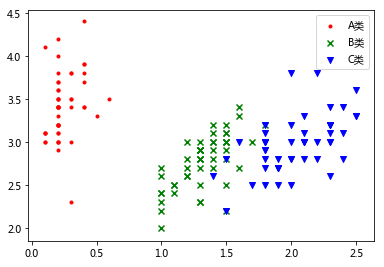

In [7]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets


data,target=datasets.load_iris(return_X_y=True)

figure = plt.figure('机器学习可视化',figsize=(6,4))
ax = figure.add_axes([0.1, 0.1, 0.8, 0.8], label='鸢尾花数据集')

# 切换特征维度观察数据的线性可分性
ax.scatter(x=data[0:50:,3], y=data[0:50,1],color='r',label='A类',marker='.')
ax.scatter(x=data[50:100,3], y=data[50:100,1],color='g',label='B类',marker='x' )
ax.scatter(x=data[100:150,3], y=data[100:150,1],color='b',label='C类',marker='v' )
ax.legend()
plt.show()

2. 使用numpy训练

In [29]:
import numpy.linalg as ln

Weight_W=np.matmul(
        np.matmul( 
            ln.inv(
                np.matmul( 
                    sample_X.T,
                    sample_X)
            ), 
            sample_X.T
        ),
    sample_Y
)
print(Weight_W.shape)
print(Weight_W)

(5, 1)
[[-0.02639562]
 [-0.1707696 ]
 [ 0.19689572]
 [ 0.30223492]
 [ 0.37200093]]


3. 使用sklearn训练

In [53]:
from sklearn.linear_model import *
import numpy as np
from sklearn import datasets

data,target=datasets.load_iris(return_X_y=True)
data=data[ 0 : 100 ]
target=target[0: 100]
regression=LinearRegression()
# 训练
# 数据格式整理
# Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.
# 如果是一维特征，使用reshape处理单特征形状（-1, 1），如果只有一个样本，形状reshape(1,-1)

regression.fit(data, target)

# 测试
print('评估：',regression.score(data, target))
# 斜率
print('斜率：',regression.coef_)
# 截距
print('截距：',regression.intercept_ )

评估： 0.9636468378453332
斜率： [-0.02639767 -0.17076425  0.19689835  0.30223072]
截距： 0.3719920303087039


4. 测试预测效果     
&emsp;&emsp;首先使用训练集来做测试，看看测试效果；      
&emsp;&emsp;既然sklearn与numpy的结果都一样，为了方便，我们直接使用sklearn来做测试。

In [54]:
pre=regression.predict(data)
print(pre)

[-0.02420711  0.06645455  0.01789139  0.07698725 -0.03864377  0.01908353
  0.03629122  0.01519891  0.0967298   0.03884488 -0.04658943  0.04016828
  0.03887124 -0.00699943 -0.16744728 -0.11359756 -0.05967581  0.00601596
 -0.00198241 -0.02552348  0.04401952  0.02177601 -0.10684405  0.15968446
  0.09923779  0.10319445  0.09533489 -0.00715705 -0.00977046  0.0769609
  0.09139756  0.06508599 -0.13983867 -0.15430116  0.03884488 -0.00971774
 -0.05445602  0.03884488  0.05996354  0.01255915 -0.01103411  0.20708183
  0.02581069  0.13870461  0.08345893  0.09931738 -0.03605672  0.04022099
 -0.04394966  0.0125855   0.98930802  0.99599002  1.07862696  1.01454043
  1.08134579  1.02232795  1.05115611  0.78480454  1.00118346  0.96468727
  0.88985015  0.9842722   0.92774881  1.0642952   0.83068277  0.95523424
  1.05126101  0.86733605  1.17203381  0.89761183  1.15892758  0.9133197
  1.19692411  1.02092548  0.94739348  0.97495043  1.08258309  1.18111889
  1.05777837  0.76891323  0.89763819  0.84772528  0.8

&emsp;&emsp;&emsp;&emsp;实际上根据上面的显示结果，可以看得出，输出的前50的结果在0附近摆动，后50的值在1附近摆动，我们可以设计一个阈值，用来对结果分类。    
&emsp;&emsp;&emsp;&emsp;我们以0.5作为分界，小于0.5属于第一类，大于0.5属于第二类。

In [55]:
# 统计识别正确的个数
# 第一类：前50
cls_a=pre[0:50]
cls_a=cls_a<0.5
a_num=cls_a.sum()

# 第二类：后50
cls_b=pre[50:]
cls_b=cls_b>0.5
b_num=cls_b.sum()
# 统计正确率
a_pct=cls_a.mean()
b_pct=cls_b.mean()

print("A类识别正确数：%d，识别正确率：%5.2f%%"%(a_num,a_pct*100))
print("B类识别正确数：%d，识别正确率：%5.2f%%"%(b_num,b_pct*100))

A类识别正确数：50，识别正确率：100.00%
B类识别正确数：50，识别正确率：100.00%


5. 测试第二类与第三类样本

In [4]:
from sklearn.linear_model import *
import numpy as np
from sklearn import datasets

data,target=datasets.load_iris(return_X_y=True)
data=data[ 50 : 150 ]
target=target[0: 100]
regression=LinearRegression()
# 训练
regression.fit(data, target)

# 测试
print('评估：',regression.score(data, target))
# 斜率
print('斜率：',regression.coef_)
# 截距
print('截距：',regression.intercept_ )

pre=regression.predict(data)

print(pre)
# 第二类：前50
cls_a=pre[0:50]
cls_a=cls_a<0.5
a_num=cls_a.sum()

# 第三类：后50
cls_b=pre[50:]
cls_b=cls_b>0.5
b_num=cls_b.sum()
# 统计正确率
a_pct=cls_a.mean()
b_pct=cls_b.mean()

print("第二类识别正确数：%d，识别正确率：%5.2f%%"%(a_num,a_pct*100))
print("第三类识别正确数：%d，识别正确率：%5.2f%%"%(b_num,b_pct*100))

评估： 0.7838897029563259
斜率： [-0.1960596  -0.30755035  0.38426438  0.68284465]
截距： -0.4186388637778191
[-1.31920845e-02  9.58752648e-02  1.82306251e-01  2.20423098e-01
  2.37715882e-01  2.19568194e-01  2.29863531e-01 -1.66534637e-01
  5.07859568e-02  1.86078866e-01  1.37324178e-02  1.40135821e-01
 -5.17050622e-02  2.55526660e-01 -1.37418822e-01 -3.88984833e-02
  3.14233014e-01 -1.27841878e-01  4.42637533e-01 -3.56882995e-02
  5.14037774e-01 -5.09878356e-02  4.84472220e-01  1.49712764e-01
 -2.52814368e-02  1.14625115e-02  1.87466413e-01  4.27268574e-01
  2.66564209e-01 -3.08039511e-01 -2.37537426e-02 -1.30464646e-01
 -6.81258239e-02  6.26917371e-01  3.53444934e-01  1.81073500e-01
  1.44665295e-01  2.17281170e-01  2.39583325e-02  1.58913029e-01
  2.13579280e-01  1.86345187e-01  1.05564876e-03 -1.55385562e-01
  1.54649875e-01 -2.55056548e-02  7.35338452e-02  1.39304832e-02
 -2.83496440e-01  6.58624421e-02  1.34396741e+00  8.70982686e-01
  9.67820535e-01  8.35290541e-01  1.11531432e+00  1.13

# 八、关于线性回归的变化   

1. 损失函数的变化       
&emsp;&emsp;为了防止过拟合，在损失函数上会增加一些调整项，从而产生线性回归的变化：    
&emsp;&emsp;&emsp;&emsp;|-Lasso回归       
&emsp;&emsp;&emsp;&emsp;|-Ridge回归      

2. 最小值算法     
&emsp;&emsp;在计算损失函数最小求解方面，也存在很多算法：       
&emsp;&emsp;&emsp;&emsp;|-最小二乘法    
&emsp;&emsp;&emsp;&emsp;|-梯度下降法    
&emsp;&emsp;&emsp;&emsp;|-坐标下降法     
&emsp;&emsp;&emsp;&emsp;|-牛顿迭代法     
&emsp;&emsp;&emsp;&emsp;|-拟牛顿法    

-------